In [52]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import root_mean_squared_error

In [47]:
# Load the dataset
df = pd.read_csv("train/train.csv")



In [48]:
# Preprocessing
df['doj'] = pd.to_datetime(df['doj'])
df['month'] = df['doj'].dt.to_period('D').dt.to_timestamp()



In [99]:
# Aggregate monthly bookings for each source-destination pair
agg_df = df.groupby(['srcid', 'destid', 'month'])['final_seatcount'].sum().reset_index()
agg_df['srcid'] = agg_df['srcid'].astype(str)
agg_df['destid'] = agg_df['destid'].astype(str)
agg_df['srcid']=  agg_df['srcid'].str.zfill(2)
agg_df['destid'] = agg_df['destid'].str.zfill(2)






In [100]:
agg_df.tail()

,srcid,destid,month,final_seatcount
67195,48,46,2024-12-27,5253.0
67196,48,46,2024-12-28,5871.0
67197,48,46,2024-12-29,8091.0
67198,48,46,2024-12-30,6717.0
67199,48,46,2024-12-31,5274.0


## Baseline FORECAST

In [101]:
# Forecasting next month for each pair
results = []
#accuracy_val = []
for (src, dst), group in agg_df.groupby(['srcid', 'destid']):
    data = group.rename(columns={'month': 'ds', 'final_seatcount': 'y'})

    
    #data_1 = data[ data["ds"] < '2024-12-01']
    model = Prophet()
    model.fit(data)
    
    future = model.make_future_dataframe(periods=60, freq='D')
    
    forecast = model.predict(future)
    forecast["srcid"]=src
    forecast["destid"]=dst
    forecast=forecast[["srcid","destid","ds","yhat"]]
    forecast["yhat"] = forecast.yhat.round()
    #accurracy = root_mean_squared_error(data[data["ds"]>="2024-12-01"]["y"],forecast[forecast["ds"]>="2024-12-01"]["yhat"])
    #forecast.to_csv("monthly_trial_forecast.csv", index=False)

    #accuracy_val.append([src,dst,accurracy])
    results.append(forecast)

# Save result
appended_data = pd.concat(results)


#acc = pd.DataFrame(accuracy_val,columns=["src","dest","accuracy"])
appended_data.to_csv("monthly_forecast_by_route.csv", index=False)
#acc.to_csv("accurracy.csv",index=False)





20:42:09 - cmdstanpy - INFO - Chain [1] start processing
20:42:09 - cmdstanpy - INFO - Chain [1] done processing
20:42:09 - cmdstanpy - INFO - Chain [1] start processing
20:42:09 - cmdstanpy - INFO - Chain [1] done processing
20:42:09 - cmdstanpy - INFO - Chain [1] start processing
20:42:09 - cmdstanpy - INFO - Chain [1] done processing
20:42:09 - cmdstanpy - INFO - Chain [1] start processing
20:42:09 - cmdstanpy - INFO - Chain [1] done processing
20:42:09 - cmdstanpy - INFO - Chain [1] start processing
20:42:10 - cmdstanpy - INFO - Chain [1] done processing
20:42:10 - cmdstanpy - INFO - Chain [1] start processing
20:42:10 - cmdstanpy - INFO - Chain [1] done processing
20:42:10 - cmdstanpy - INFO - Chain [1] start processing
20:42:10 - cmdstanpy - INFO - Chain [1] done processing
20:42:10 - cmdstanpy - INFO - Chain [1] start processing
20:42:10 - cmdstanpy - INFO - Chain [1] done processing
20:42:10 - cmdstanpy - INFO - Chain [1] start processing
20:42:11 - cmdstanpy - INFO - Chain [1]

In [102]:
appended_data.head()

,srcid,destid,ds,yhat
0,01,02,2023-03-01,1084.0
1,01,02,2023-03-02,1036.0
2,01,02,2023-03-03,1154.0
3,01,02,2023-03-04,1161.0
4,01,02,2023-03-05,1455.0


In [ ]:
final_submission = appended_data[appended_data["ds"]>"2024-12-31"]
final_submission = final_submission[final_submission["ds"]< "2025-03-01"]
final_submission["route_key"] = final_submission['ds'].astype(str)+"_"+final_submission["srcid"].astype(str)+"_"+final_submission["destid"].astype(str)
final_submission = final_submission[["route_key","yhat"]]
final_submission = final_submission.rename({"yhat":"final_seatcount"},axis=1)
final_submission.to_csv("final_submission.csv")

## Different Model 

In [ ]:
# Preprocessing
df['doj'] = pd.to_datetime(df['doj'])
df['month'] = df['doj'].dt.to_period('D').dt.to_timestamp()

In [ ]:
# Forecasting next month for each pair
results = []
#accuracy_val = []
for (src, dst), group in agg_df.groupby(['srcid', 'destid']):
    data = group.rename(columns={'month': 'ds', 'final_seatcount': 'y'})

    
    #data_1 = data[ data["ds"] < '2024-12-01']
    model = Prophet()
    model.fit(data)
    
    future = model.make_future_dataframe(periods=60, freq='D')
    
    forecast = model.predict(future)
    forecast["srcid"]=src
    forecast["destid"]=dst
    forecast=forecast[["srcid","destid","ds","yhat"]]
    forecast["yhat"] = forecast.yhat.round()
    #accurracy = root_mean_squared_error(data[data["ds"]>="2024-12-01"]["y"],forecast[forecast["ds"]>="2024-12-01"]["yhat"])
    #forecast.to_csv("monthly_trial_forecast.csv", index=False)

    #accuracy_val.append([src,dst,accurracy])
    results.append(forecast)

# Save result
appended_data = pd.concat(results)


#acc = pd.DataFrame(accuracy_val,columns=["src","dest","accuracy"])
appended_data.to_csv("monthly_forecast_by_route.csv", index=False)
#acc.to_csv("accurracy.csv",index=False)





## Aggregated Total Forecast

In [122]:
# Aggregate monthly bookings for each source-destination pair
agg_df_1 = df.groupby(['month'])['final_seatcount'].sum().reset_index()
data = agg_df_1.rename(columns={'month': 'ds', 'final_seatcount': 'y'})
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=60, freq='D')
forecast = model.predict(future)
forecast=forecast[["ds","yhat"]]
forecast["yhat"] = forecast.yhat.round()
final_total_forecast = forecast


21:22:26 - cmdstanpy - INFO - Chain [1] start processing
21:22:26 - cmdstanpy - INFO - Chain [1] done processing


In [136]:
total_df = agg_df_1.rename(columns={"month":"ds","final_seatcount":"total"})

In [137]:
total_df.head()

,ds,total
0,2023-03-01,137998.0
1,2023-03-02,149623.0
2,2023-03-03,198612.0
3,2023-03-04,186701.0
4,2023-03-05,205421.0


In [145]:
# Forecasting next month for each pair
results = []
#accuracy_val = []
for (src, dst), group in agg_df.groupby(['srcid', 'destid']):
    data = group.rename(columns={'month': 'ds', 'final_seatcount': 'y'})
    data = pd.merge(data,total_df,on = "ds",how = "outer")
    data["proportion"] = data["y"]/data["total"]
    print(data["proportion"])
    data = data[["ds","proportion"]]
    data = data.rename(columns={"proportion":"y"})
    #data_1 = data[ data["ds"] < '2024-12-01']
    model = Prophet()
    model.fit(data)
    
    future = model.make_future_dataframe(periods=60, freq='D')
    
    forecast = model.predict(future)
    forecast["srcid"]=src
    forecast["destid"]=dst
    forecast=forecast[["srcid","destid","ds","yhat"]]
    #forecast["yhat"] = forecast.yhat.round()
    #accurracy = root_mean_squared_error(data[data["ds"]>="2024-12-01"]["y"],forecast[forecast["ds"]>="2024-12-01"]["yhat"])
    #forecast.to_csv("monthly_trial_forecast.csv", index=False)

    #accuracy_val.append([src,dst,accurracy])
    results.append(forecast)

# Save result
appended_data = pd.concat(results)


#acc = pd.DataFrame(accuracy_val,columns=["src","dest","accuracy"])
#appended_data.to_csv("monthly_forecast_by_route.csv", index=False)
#acc.to_csv("accurracy.csv",index=False)





21:31:53 - cmdstanpy - INFO - Chain [1] start processing
21:31:53 - cmdstanpy - INFO - Chain [1] done processing


0      0.008080
1      0.006951
2      0.004708
3      0.006267
4      0.007205
         ...   
667    0.005964
668    0.005224
669    0.005717
670    0.006545
671    0.007840
Name: proportion, Length: 672, dtype: float64


21:31:53 - cmdstanpy - INFO - Chain [1] start processing
21:31:53 - cmdstanpy - INFO - Chain [1] done processing


0      0.006594
1      0.010125
2      0.008358
3      0.007900
4      0.006694
         ...   
667    0.006644
668    0.005966
669    0.005249
670    0.005559
671    0.005951
Name: proportion, Length: 672, dtype: float64
0      0.007899
1      0.007485
2      0.009038
3      0.010525
4      0.005866
         ...   
667    0.006933
668    0.006948
669    0.004405
670    0.004183
671    0.008011
Name: proportion, Length: 672, dtype: float64


21:31:53 - cmdstanpy - INFO - Chain [1] start processing
21:31:53 - cmdstanpy - INFO - Chain [1] done processing
21:31:53 - cmdstanpy - INFO - Chain [1] start processing
21:31:53 - cmdstanpy - INFO - Chain [1] done processing


0      0.010109
1      0.007719
2      0.010448
3      0.008061
4      0.008689
         ...   
667    0.009278
668    0.007155
669    0.006311
670    0.006824
671    0.007897
Name: proportion, Length: 672, dtype: float64
0      0.011196
1      0.012398
2      0.012839
3      0.010927
4      0.007448
         ...   
667    0.010773
668    0.009362
669    0.007498
670    0.006656
671    0.007324
Name: proportion, Length: 672, dtype: float64


21:31:53 - cmdstanpy - INFO - Chain [1] start processing
21:31:53 - cmdstanpy - INFO - Chain [1] done processing
21:31:54 - cmdstanpy - INFO - Chain [1] start processing
21:31:54 - cmdstanpy - INFO - Chain [1] done processing


0      0.007645
1      0.007252
2      0.008761
3      0.009159
4      0.007083
         ...   
667    0.009040
668    0.008207
669    0.005795
670    0.004351
671    0.005579
Name: proportion, Length: 672, dtype: float64


21:31:54 - cmdstanpy - INFO - Chain [1] start processing
21:31:54 - cmdstanpy - INFO - Chain [1] done processing


0      0.006775
1      0.007886
2      0.008937
3      0.007284
4      0.006694
         ...   
667    0.006338
668    0.005776
669    0.004717
670    0.004704
671    0.004578
Name: proportion, Length: 672, dtype: float64


21:31:54 - cmdstanpy - INFO - Chain [1] start processing
21:31:54 - cmdstanpy - INFO - Chain [1] done processing


0      0.014319
1      0.013233
2      0.017280
3      0.021339
4      0.017739
         ...   
667    0.011120
668    0.011476
669    0.013459
670    0.011572
671    0.013321
Name: proportion, Length: 672, dtype: float64


21:31:55 - cmdstanpy - INFO - Chain [1] start processing
21:31:55 - cmdstanpy - INFO - Chain [1] done processing


0      0.013913
1      0.012699
2      0.020361
3      0.012576
4      0.009249
         ...   
667    0.015103
668    0.011379
669    0.010097
670    0.009312
671    0.007118
Name: proportion, Length: 672, dtype: float64


21:31:55 - cmdstanpy - INFO - Chain [1] start processing
21:31:55 - cmdstanpy - INFO - Chain [1] done processing


0      0.010406
1      0.012244
2      0.016072
3      0.016004
4      0.011839
         ...   
667    0.013920
668    0.011779
669    0.010235
670    0.010873
671    0.007622
Name: proportion, Length: 672, dtype: float64


21:31:55 - cmdstanpy - INFO - Chain [1] start processing
21:31:55 - cmdstanpy - INFO - Chain [1] done processing


0      0.010761
1      0.008455
2      0.011480
3      0.008007
4      0.007545
         ...   
667    0.010111
668    0.010638
669    0.009622
670    0.007716
671    0.006294
Name: proportion, Length: 672, dtype: float64


21:31:55 - cmdstanpy - INFO - Chain [1] start processing
21:31:55 - cmdstanpy - INFO - Chain [1] done processing


0      0.009536
1      0.007967
2      0.005055
3      0.007049
4      0.008276
         ...   
667    0.004037
668    0.005628
669    0.006323
670    0.006054
671    0.005310
Name: proportion, Length: 672, dtype: float64


21:31:56 - cmdstanpy - INFO - Chain [1] start processing
21:31:56 - cmdstanpy - INFO - Chain [1] done processing


0      0.008370
1      0.007018
2      0.004053
3      0.006481
4      0.008008
         ...   
667    0.004843
668    0.005741
669    0.007279
670    0.005764
671    0.003662
Name: proportion, Length: 672, dtype: float64


21:31:56 - cmdstanpy - INFO - Chain [1] start processing
21:31:56 - cmdstanpy - INFO - Chain [1] done processing


0      0.007029
1      0.004846
2      0.004985
3      0.006374
4      0.005063
         ...   
667    0.005336
668    0.007621
669    0.004733
670    0.005206
671    0.006266
Name: proportion, Length: 672, dtype: float64


21:31:56 - cmdstanpy - INFO - Chain [1] start processing
21:31:56 - cmdstanpy - INFO - Chain [1] done processing


0      0.008732
1      0.006049
2      0.005639
3      0.007686
4      0.011148
         ...   
667    0.005251
668    0.007086
669    0.009497
670    0.007493
671    0.007267
Name: proportion, Length: 672, dtype: float64


21:31:56 - cmdstanpy - INFO - Chain [1] start processing
21:31:56 - cmdstanpy - INFO - Chain [1] done processing


0      0.009652
1      0.009143
2      0.006978
3      0.007054
4      0.013144
         ...   
667    0.010889
668    0.009579
669    0.016439
670    0.009583
671    0.008257
Name: proportion, Length: 672, dtype: float64


21:31:57 - cmdstanpy - INFO - Chain [1] start processing
21:31:57 - cmdstanpy - INFO - Chain [1] done processing


0      0.007826
1      0.005848
2      0.004985
3      0.005276
4      0.007521
         ...   
667    0.005081
668    0.005362
669    0.007014
670    0.004239
671    0.003462
Name: proportion, Length: 672, dtype: float64


21:31:57 - cmdstanpy - INFO - Chain [1] start processing
21:31:57 - cmdstanpy - INFO - Chain [1] done processing


0      0.004928
1      0.004678
2      0.006606
3      0.007413
4      0.007088
         ...   
667    0.012670
668    0.014262
669    0.017595
670    0.015202
671    0.019730
Name: proportion, Length: 672, dtype: float64


21:31:57 - cmdstanpy - INFO - Chain [1] start processing
21:31:57 - cmdstanpy - INFO - Chain [1] done processing


0      0.006594
1      0.005681
2      0.004808
3      0.005945
4      0.011002
         ...   
667    0.005353
668    0.004897
669    0.009169
670    0.006173
671    0.003519
Name: proportion, Length: 672, dtype: float64


21:31:57 - cmdstanpy - INFO - Chain [1] start processing
21:31:57 - cmdstanpy - INFO - Chain [1] done processing


0      0.015848
1      0.012391
2      0.014531
3      0.012871
4      0.019891
         ...   
667    0.011572
668    0.013335
669    0.015811
670    0.019378
671    0.018351
Name: proportion, Length: 672, dtype: float64


21:31:58 - cmdstanpy - INFO - Chain [1] start processing
21:31:58 - cmdstanpy - INFO - Chain [1] done processing


0      0.023718
1      0.020933
2      0.023095
3      0.023155
4      0.034305
         ...   
667    0.019626
668    0.020824
669    0.027105
670    0.027433
671    0.024497
Name: proportion, Length: 672, dtype: float64


21:31:58 - cmdstanpy - INFO - Chain [1] start processing
21:31:58 - cmdstanpy - INFO - Chain [1] done processing


0      0.009333
1      0.010319
2      0.008781
3      0.008548
4      0.005355
         ...   
667    0.008687
668    0.009338
669    0.009797
670    0.010412
671    0.009316
Name: proportion, Length: 672, dtype: float64


21:31:58 - cmdstanpy - INFO - Chain [1] start processing
21:31:58 - cmdstanpy - INFO - Chain [1] done processing


0      0.008174
1      0.008582
2      0.009848
3      0.013455
4      0.013105
         ...   
667    0.010032
668    0.012262
669    0.015396
670    0.014146
671    0.011673
Name: proportion, Length: 672, dtype: float64


21:31:58 - cmdstanpy - INFO - Chain [1] start processing
21:31:58 - cmdstanpy - INFO - Chain [1] done processing


0      0.009826
1      0.008902
2      0.010392
3      0.012876
4      0.012813
         ...   
667    0.009856
668    0.008786
669    0.011597
670    0.012673
671    0.013917
Name: proportion, Length: 672, dtype: float64


21:31:59 - cmdstanpy - INFO - Chain [1] start processing
21:31:59 - cmdstanpy - INFO - Chain [1] done processing


0      0.010797
1      0.009892
2      0.006294
3      0.008597
4      0.009128
         ...   
667    0.006831
668    0.008328
669    0.011294
670    0.009297
671    0.009499
Name: proportion, Length: 672, dtype: float64


21:31:59 - cmdstanpy - INFO - Chain [1] start processing
21:31:59 - cmdstanpy - INFO - Chain [1] done processing


0      0.008000
1      0.006336
2      0.004270
3      0.007391
4      0.009035
         ...   
667    0.008102
668    0.009228
669    0.012397
670    0.009907
671    0.012429
Name: proportion, Length: 672, dtype: float64


21:31:59 - cmdstanpy - INFO - Chain [1] start processing
21:31:59 - cmdstanpy - INFO - Chain [1] done processing


0      0.007102
1      0.007753
2      0.006445
3      0.008677
4      0.008495
         ...   
667    0.005964
668    0.007207
669    0.008591
670    0.007679
671    0.008755
Name: proportion, Length: 672, dtype: float64


21:32:00 - cmdstanpy - INFO - Chain [1] start processing
21:32:00 - cmdstanpy - INFO - Chain [1] done processing


0      0.007609
1      0.006483
2      0.004632
3      0.006186
4      0.006158
         ...   
667    0.006185
668    0.006259
669    0.005905
670    0.009092
671    0.010701
Name: proportion, Length: 672, dtype: float64


21:32:00 - cmdstanpy - INFO - Chain [1] start processing
21:32:00 - cmdstanpy - INFO - Chain [1] done processing


0      0.008986
1      0.008582
2      0.008942
3      0.007927
4      0.009833
         ...   
667    0.007599
668    0.008897
669    0.010135
670    0.010219
671    0.011330
Name: proportion, Length: 672, dtype: float64


21:32:00 - cmdstanpy - INFO - Chain [1] start processing
21:32:00 - cmdstanpy - INFO - Chain [1] done processing


0      0.007790
1      0.007151
2      0.007351
3      0.007981
4      0.006669
         ...   
667    0.009550
668    0.012655
669    0.011341
670    0.012532
671    0.015135
Name: proportion, Length: 672, dtype: float64


21:32:01 - cmdstanpy - INFO - Chain [1] start processing
21:32:01 - cmdstanpy - INFO - Chain [1] done processing


0      0.007718
1      0.008154
2      0.005312
3      0.008623
4      0.007180
         ...   
667    0.007749
668    0.009259
669    0.009950
670    0.009910
671    0.011673
Name: proportion, Length: 672, dtype: float64


21:32:01 - cmdstanpy - INFO - Chain [1] start processing
21:32:01 - cmdstanpy - INFO - Chain [1] done processing


0      0.009449
1      0.012004
2      0.010453
3      0.015404
4      0.014254
         ...   
667    0.010834
668    0.012979
669    0.009585
670    0.009669
671    0.014351
Name: proportion, Length: 672, dtype: float64


21:32:01 - cmdstanpy - INFO - Chain [1] start processing
21:32:01 - cmdstanpy - INFO - Chain [1] done processing


0      0.008841
1      0.007920
2      0.007250
3      0.006856
4      0.008203
         ...   
667    0.007188
668    0.007431
669    0.009201
670    0.008776
671    0.008097
Name: proportion, Length: 672, dtype: float64


21:32:02 - cmdstanpy - INFO - Chain [1] start processing
21:32:02 - cmdstanpy - INFO - Chain [1] done processing


0      0.006667
1      0.006784
2      0.004682
3      0.005597
4      0.006718
         ...   
667    0.005268
668    0.004534
669    0.004952
670    0.008162
671    0.013476
Name: proportion, Length: 672, dtype: float64


21:32:02 - cmdstanpy - INFO - Chain [1] start processing
21:32:02 - cmdstanpy - INFO - Chain [1] done processing


0      0.006341
1      0.005514
2      0.008408
3      0.009775
4      0.006134
         ...   
667    0.006355
668    0.007397
669    0.007389
670    0.010784
671    0.009470
Name: proportion, Length: 672, dtype: float64


21:32:02 - cmdstanpy - INFO - Chain [1] start processing
21:32:02 - cmdstanpy - INFO - Chain [1] done processing


0      0.010254
1      0.008889
2      0.011706
3      0.018398
4      0.014628
         ...   
667    0.008955
668    0.009103
669    0.007186
670    0.008479
671    0.011988
Name: proportion, Length: 672, dtype: float64


21:32:03 - cmdstanpy - INFO - Chain [1] start processing
21:32:03 - cmdstanpy - INFO - Chain [1] done processing


0      0.006406
1      0.004732
2      0.009949
3      0.013455
4      0.008373
         ...   
667    0.021859
668    0.020041
669    0.015308
670    0.011900
671    0.008515
Name: proportion, Length: 672, dtype: float64
0      0.004087
1      0.004411
2      0.004169
3      0.007113
4      0.007166
         ...   
667    0.017061
668    0.025504
669    0.025218
670    0.027503
671    0.029115
Name: proportion, Length: 672, dtype: float64


21:32:03 - cmdstanpy - INFO - Chain [1] start processing
21:32:03 - cmdstanpy - INFO - Chain [1] done processing
21:32:03 - cmdstanpy - INFO - Chain [1] start processing
21:32:03 - cmdstanpy - INFO - Chain [1] done processing


0      0.008116
1      0.009958
2      0.008861
3      0.008168
4      0.009493
         ...   
667    0.006338
668    0.007172
669    0.007779
670    0.007456
671    0.009070
Name: proportion, Length: 672, dtype: float64


21:32:03 - cmdstanpy - INFO - Chain [1] start processing
21:32:03 - cmdstanpy - INFO - Chain [1] done processing


0      0.009239
1      0.006750
2      0.004229
3      0.007177
4      0.005744
         ...   
667    0.004724
668    0.005017
669    0.005171
670    0.006006
671    0.006781
Name: proportion, Length: 672, dtype: float64


21:32:04 - cmdstanpy - INFO - Chain [1] start processing
21:32:04 - cmdstanpy - INFO - Chain [1] done processing


0      0.006087
1      0.004972
2      0.003524
3      0.005827
4      0.012326
         ...   
667    0.007817
668    0.009641
669    0.014984
670    0.012926
671    0.010964
Name: proportion, Length: 672, dtype: float64


21:32:04 - cmdstanpy - INFO - Chain [1] start processing
21:32:04 - cmdstanpy - INFO - Chain [1] done processing


0      0.008370
1      0.006784
2      0.005186
3      0.006749
4      0.010077
         ...   
667    0.009669
668    0.011190
669    0.011169
670    0.013629
671    0.006438
Name: proportion, Length: 672, dtype: float64


21:32:04 - cmdstanpy - INFO - Chain [1] start processing
21:32:04 - cmdstanpy - INFO - Chain [1] done processing


0      0.011652
1      0.009143
2      0.012104
3      0.015104
4      0.012735
         ...   
667    0.012140
668    0.015283
669    0.010035
670    0.009520
671    0.013024
Name: proportion, Length: 672, dtype: float64


21:32:04 - cmdstanpy - INFO - Chain [1] start processing
21:32:05 - cmdstanpy - INFO - Chain [1] done processing


0      0.008667
1      0.010105
2      0.010775
3      0.009148
4      0.005550
         ...   
667    0.009149
668    0.006372
669    0.005561
670    0.005980
671    0.006752
Name: proportion, Length: 672, dtype: float64


21:32:05 - cmdstanpy - INFO - Chain [1] start processing
21:32:05 - cmdstanpy - INFO - Chain [1] done processing


0      0.011247
1      0.009731
2      0.007573
3      0.011548
4      0.012229
         ...   
667    0.009964
668    0.013103
669    0.011897
670    0.011096
671    0.008423
Name: proportion, Length: 672, dtype: float64


21:32:05 - cmdstanpy - INFO - Chain [1] start processing
21:32:05 - cmdstanpy - INFO - Chain [1] done processing


0      0.007304
1      0.006737
2      0.005216
3      0.006256
4      0.006095
         ...   
667    0.008605
668    0.010166
669    0.009285
670    0.011781
671    0.014924
Name: proportion, Length: 672, dtype: float64


21:32:05 - cmdstanpy - INFO - Chain [1] start processing
21:32:05 - cmdstanpy - INFO - Chain [1] done processing


0      0.004312
1      0.004144
2      0.004783
3      0.005303
4      0.011367
         ...   
667    0.004605
668    0.004621
669    0.009060
670    0.006489
671    0.007067
Name: proportion, Length: 672, dtype: float64


21:32:06 - cmdstanpy - INFO - Chain [1] start processing
21:32:06 - cmdstanpy - INFO - Chain [1] done processing


0      0.005254
1      0.005180
2      0.004657
3      0.004526
4      0.008519
         ...   
667    0.008020
668    0.012276
669    0.019479
670    0.022014
671    0.015536
Name: proportion, Length: 672, dtype: float64


21:32:06 - cmdstanpy - INFO - Chain [1] start processing
21:32:06 - cmdstanpy - INFO - Chain [1] done processing


0      0.008899
1      0.008715
2      0.010916
3      0.010070
4      0.023815
         ...   
667    0.007898
668    0.008993
669    0.016446
670    0.015083
671    0.015565
Name: proportion, Length: 672, dtype: float64


21:32:06 - cmdstanpy - INFO - Chain [1] start processing
21:32:06 - cmdstanpy - INFO - Chain [1] done processing


0      0.006029
1      0.006336
2      0.007512
3      0.007327
4      0.005997
         ...   
667    0.014179
668    0.015959
669    0.011222
670    0.011989
671    0.014489
Name: proportion, Length: 672, dtype: float64


21:32:06 - cmdstanpy - INFO - Chain [1] start processing
21:32:07 - cmdstanpy - INFO - Chain [1] done processing


0      0.014464
1      0.015292
2      0.018186
3      0.022817
4      0.017720
         ...   
667    0.012099
668    0.010179
669    0.007935
670    0.008806
671    0.010895
Name: proportion, Length: 672, dtype: float64
0      0.007044
1      0.007084
2      0.010614
3      0.014205
4      0.008587
         ...   
667    0.011854
668    0.012455
669    0.010122
670    0.009832
671    0.014191
Name: proportion, Length: 672, dtype: float64


21:32:07 - cmdstanpy - INFO - Chain [1] start processing
21:32:07 - cmdstanpy - INFO - Chain [1] done processing
21:32:07 - cmdstanpy - INFO - Chain [1] start processing
21:32:07 - cmdstanpy - INFO - Chain [1] done processing


0      0.004928
1      0.005815
2      0.006999
3      0.007472
4      0.007886
         ...   
667    0.007749
668    0.006759
669    0.006405
670    0.009445
671    0.009671
Name: proportion, Length: 672, dtype: float64


21:32:07 - cmdstanpy - INFO - Chain [1] start processing
21:32:07 - cmdstanpy - INFO - Chain [1] done processing


0      0.010377
1      0.011415
2      0.012990
3      0.014633
4      0.010418
         ...   
667    0.005750
668    0.005214
669    0.004261
670    0.004314
671    0.006638
Name: proportion, Length: 672, dtype: float64


21:32:07 - cmdstanpy - INFO - Chain [1] start processing
21:32:07 - cmdstanpy - INFO - Chain [1] done processing


0      0.001370
1      0.001805
2      0.002205
3      0.002667
4      0.002088
         ...   
667    0.001213
668    0.000931
669    0.000900
670    0.001138
671    0.000893
Name: proportion, Length: 672, dtype: float64


21:32:08 - cmdstanpy - INFO - Chain [1] start processing
21:32:08 - cmdstanpy - INFO - Chain [1] done processing


0      0.016319
1      0.013875
2      0.013675
3      0.013776
4      0.011975
         ...   
667    0.022688
668    0.022469
669    0.017545
670    0.020631
671    0.021470
Name: proportion, Length: 672, dtype: float64


21:32:08 - cmdstanpy - INFO - Chain [1] start processing
21:32:08 - cmdstanpy - INFO - Chain [1] done processing


0      0.000696
1      0.000401
2      0.000322
3      0.000364
4      0.000185
         ...   
667    0.000619
668    0.000566
669    0.000625
670    0.000714
671    0.000423
Name: proportion, Length: 672, dtype: float64


21:32:08 - cmdstanpy - INFO - Chain [1] start processing
21:32:08 - cmdstanpy - INFO - Chain [1] done processing


0      0.005688
1      0.005079
2      0.004179
3      0.005303
4      0.004892
         ...   
667    0.003314
668    0.004569
669    0.005077
670    0.004667
671    0.003061
Name: proportion, Length: 672, dtype: float64


21:32:08 - cmdstanpy - INFO - Chain [1] start processing
21:32:08 - cmdstanpy - INFO - Chain [1] done processing


0      0.005884
1      0.006363
2      0.006223
3      0.004242
4      0.014409
         ...   
667    0.009869
668    0.011393
669    0.013934
670    0.013402
671    0.008561
Name: proportion, Length: 672, dtype: float64


21:32:09 - cmdstanpy - INFO - Chain [1] start processing
21:32:09 - cmdstanpy - INFO - Chain [1] done processing


0      0.009623
1      0.008608
2      0.010090
3      0.011291
4      0.006309
         ...   
667    0.010685
668    0.012400
669    0.013246
670    0.013357
671    0.012681
Name: proportion, Length: 672, dtype: float64


21:32:09 - cmdstanpy - INFO - Chain [1] start processing
21:32:09 - cmdstanpy - INFO - Chain [1] done processing


0      0.013276
1      0.012191
2      0.010110
3      0.013240
4      0.009639
         ...   
667    0.018107
668    0.027641
669    0.021307
670    0.019263
671    0.018655
Name: proportion, Length: 672, dtype: float64


21:32:09 - cmdstanpy - INFO - Chain [1] start processing
21:32:09 - cmdstanpy - INFO - Chain [1] done processing


0      0.007015
1      0.007432
2      0.006163
3      0.008184
4      0.009444
         ...   
667    0.007708
668    0.007931
669    0.010647
670    0.009877
671    0.009041
Name: proportion, Length: 672, dtype: float64


21:32:10 - cmdstanpy - INFO - Chain [1] start processing
21:32:10 - cmdstanpy - INFO - Chain [1] done processing


0      0.007449
1      0.006389
2      0.006203
3      0.008955
4      0.007633
         ...   
667    0.008877
668    0.010759
669    0.012584
670    0.009564
671    0.005699
Name: proportion, Length: 672, dtype: float64


21:32:10 - cmdstanpy - INFO - Chain [1] start processing
21:32:10 - cmdstanpy - INFO - Chain [1] done processing


0      0.005580
1      0.005079
2      0.005438
3      0.005892
4      0.007424
         ...   
667    0.004979
668    0.005914
669    0.006733
670    0.006563
671    0.007782
Name: proportion, Length: 672, dtype: float64


21:32:10 - cmdstanpy - INFO - Chain [1] start processing
21:32:10 - cmdstanpy - INFO - Chain [1] done processing


0      0.007681
1      0.006683
2      0.009828
3      0.008034
4      0.016123
         ...   
667    0.011161
668    0.010510
669    0.016833
670    0.013462
671    0.014626
Name: proportion, Length: 672, dtype: float64


21:32:11 - cmdstanpy - INFO - Chain [1] start processing
21:32:11 - cmdstanpy - INFO - Chain [1] done processing


0      0.008522
1      0.011068
2      0.008741
3      0.006749
4      0.005472
         ...   
667    0.005546
668    0.004207
669    0.003699
670    0.004671
671    0.004555
Name: proportion, Length: 672, dtype: float64


21:32:11 - cmdstanpy - INFO - Chain [1] start processing
21:32:11 - cmdstanpy - INFO - Chain [1] done processing


0      0.008478
1      0.009290
2      0.013015
3      0.010793
4      0.006669
         ...   
667    0.007341
668    0.005190
669    0.004561
670    0.005615
671    0.004664
Name: proportion, Length: 672, dtype: float64


21:32:11 - cmdstanpy - INFO - Chain [1] start processing
21:32:11 - cmdstanpy - INFO - Chain [1] done processing


0      0.020066
1      0.020050
2      0.016842
3      0.014237
4      0.012939
         ...   
667    0.015426
668    0.011648
669    0.011116
670    0.010620
671    0.010540
Name: proportion, Length: 672, dtype: float64


21:32:12 - cmdstanpy - INFO - Chain [1] start processing
21:32:12 - cmdstanpy - INFO - Chain [1] done processing


0      0.007536
1      0.009384
2      0.014380
3      0.008763
4      0.006231
         ...   
667    0.017020
668    0.011269
669    0.007735
670    0.010308
671    0.014100
Name: proportion, Length: 672, dtype: float64


21:32:12 - cmdstanpy - INFO - Chain [1] start processing
21:32:12 - cmdstanpy - INFO - Chain [1] done processing


0      0.005688
1      0.007586
2      0.010448
3      0.007418
4      0.006718
         ...   
667    0.012693
668    0.009379
669    0.007467
670    0.007103
671    0.003691
Name: proportion, Length: 672, dtype: float64


21:32:12 - cmdstanpy - INFO - Chain [1] start processing
21:32:12 - cmdstanpy - INFO - Chain [1] done processing


0      0.007855
1      0.012832
2      0.011077
3      0.007177
4      0.006504
         ...   
667    0.015035
668    0.012083
669    0.009248
670    0.010338
671    0.009980
Name: proportion, Length: 672, dtype: float64


21:32:12 - cmdstanpy - INFO - Chain [1] start processing
21:32:13 - cmdstanpy - INFO - Chain [1] done processing


0      0.006406
1      0.009785
2      0.011178
3      0.007863
4      0.009055
         ...   
667    0.008143
668    0.007076
669    0.007648
670    0.007274
671    0.006981
Name: proportion, Length: 672, dtype: float64


21:32:13 - cmdstanpy - INFO - Chain [1] start processing
21:32:13 - cmdstanpy - INFO - Chain [1] done processing


0      0.008515
1      0.008789
2      0.006394
3      0.005972
4      0.005550
         ...   
667    0.006287
668    0.005759
669    0.004983
670    0.005485
671    0.005236
Name: proportion, Length: 672, dtype: float64


21:32:13 - cmdstanpy - INFO - Chain [1] start processing
21:32:13 - cmdstanpy - INFO - Chain [1] done processing


0      0.020566
1      0.022670
2      0.019173
3      0.016551
4      0.020173
         ...   
667    0.018617
668    0.016386
669    0.019276
670    0.020646
671    0.017487
Name: proportion, Length: 672, dtype: float64


21:32:13 - cmdstanpy - INFO - Chain [1] start processing
21:32:14 - cmdstanpy - INFO - Chain [1] done processing


0      0.019710
1      0.020024
2      0.020784
3      0.016165
4      0.015500
         ...   
667    0.018019
668    0.015545
669    0.015515
670    0.014919
671    0.010712
Name: proportion, Length: 672, dtype: float64


21:32:14 - cmdstanpy - INFO - Chain [1] start processing
21:32:14 - cmdstanpy - INFO - Chain [1] done processing


0      0.011420
1      0.013046
2      0.009204
3      0.007434
4      0.006659
         ...   
667    0.010658
668    0.009352
669    0.007211
670    0.007080
671    0.008995
Name: proportion, Length: 672, dtype: float64


21:32:14 - cmdstanpy - INFO - Chain [1] start processing
21:32:14 - cmdstanpy - INFO - Chain [1] done processing


0      0.030327
1      0.034406
2      0.032052
3      0.021162
4      0.025061
         ...   
667    0.025672
668    0.017969
669    0.017527
670    0.016288
671    0.015296
Name: proportion, Length: 672, dtype: float64


21:32:14 - cmdstanpy - INFO - Chain [1] start processing
21:32:14 - cmdstanpy - INFO - Chain [1] done processing


0      0.009739
1      0.010373
2      0.009728
3      0.009770
4      0.006523
         ...   
667    0.009162
668    0.008690
669    0.005099
670    0.005637
671    0.005379
Name: proportion, Length: 672, dtype: float64


21:32:15 - cmdstanpy - INFO - Chain [1] start processing
21:32:15 - cmdstanpy - INFO - Chain [1] done processing


0      0.011942
1      0.011442
2      0.010815
3      0.009727
4      0.007146
         ...   
667    0.010631
668    0.009172
669    0.006236
670    0.006158
671    0.006340
Name: proportion, Length: 672, dtype: float64


21:32:15 - cmdstanpy - INFO - Chain [1] start processing
21:32:15 - cmdstanpy - INFO - Chain [1] done processing


0      0.008044
1      0.011596
2      0.008006
3      0.008248
4      0.007399
         ...   
667    0.007783
668    0.008000
669    0.006061
670    0.006173
671    0.003834
Name: proportion, Length: 672, dtype: float64


21:32:15 - cmdstanpy - INFO - Chain [1] start processing
21:32:15 - cmdstanpy - INFO - Chain [1] done processing


0      0.009819
1      0.009825
2      0.008157
3      0.007740
4      0.008032
         ...   
667    0.006593
668    0.007672
669    0.006467
670    0.007512
671    0.008097
Name: proportion, Length: 672, dtype: float64


21:32:15 - cmdstanpy - INFO - Chain [1] start processing
21:32:15 - cmdstanpy - INFO - Chain [1] done processing


0      0.007573
1      0.007485
2      0.008056
3      0.007874
4      0.006645
         ...   
667    0.007426
668    0.006310
669    0.003765
670    0.004500
671    0.005064
Name: proportion, Length: 672, dtype: float64


21:32:16 - cmdstanpy - INFO - Chain [1] start processing
21:32:16 - cmdstanpy - INFO - Chain [1] done processing


0      0.018754
1      0.022430
2      0.017904
3      0.014633
4      0.009658
         ...   
667    0.014165
668    0.012014
669    0.008360
670    0.008672
671    0.011330
Name: proportion, Length: 672, dtype: float64


21:32:16 - cmdstanpy - INFO - Chain [1] start processing
21:32:16 - cmdstanpy - INFO - Chain [1] done processing


0      0.011884
1      0.015666
2      0.013675
3      0.013562
4      0.009756
         ...   
667    0.015171
668    0.013186
669    0.010022
670    0.010368
671    0.011994
Name: proportion, Length: 672, dtype: float64


21:32:17 - cmdstanpy - INFO - Chain [1] start processing
21:32:17 - cmdstanpy - INFO - Chain [1] done processing


0      0.016652
1      0.015880
2      0.016001
3      0.015222
4      0.019959
         ...   
667    0.016761
668    0.016379
669    0.018308
670    0.019776
671    0.017613
Name: proportion, Length: 672, dtype: float64


21:32:17 - cmdstanpy - INFO - Chain [1] start processing
21:32:17 - cmdstanpy - INFO - Chain [1] done processing


0      0.010942
1      0.008521
2      0.008786
3      0.006936
4      0.007838
         ...   
667    0.008768
668    0.006914
669    0.008092
670    0.006991
671    0.004664
Name: proportion, Length: 672, dtype: float64


21:32:17 - cmdstanpy - INFO - Chain [1] start processing
21:32:17 - cmdstanpy - INFO - Chain [1] done processing


0      0.035935
1      0.040622
2      0.030074
3      0.027622
4      0.019321
         ...   
667    0.022838
668    0.020835
669    0.015971
670    0.015094
671    0.018042
Name: proportion, Length: 672, dtype: float64


21:32:17 - cmdstanpy - INFO - Chain [1] start processing
21:32:17 - cmdstanpy - INFO - Chain [1] done processing


0      0.008587
1      0.010994
2      0.009013
3      0.007284
4      0.008349
         ...   
667    0.009312
668    0.008776
669    0.010310
670    0.009204
671    0.009871
Name: proportion, Length: 672, dtype: float64


21:32:17 - cmdstanpy - INFO - Chain [1] start processing
21:32:18 - cmdstanpy - INFO - Chain [1] done processing


0      0.007536
1      0.007252
2      0.009038
3      0.007418
4      0.005647
         ...   
667    0.007443
668    0.006707
669    0.004343
670    0.006117
671    0.004950
Name: proportion, Length: 672, dtype: float64


21:32:18 - cmdstanpy - INFO - Chain [1] start processing
21:32:18 - cmdstanpy - INFO - Chain [1] done processing


0      0.013565
1      0.013233
2      0.014591
3      0.014253
4      0.011128
         ...   
667    0.013264
668    0.013066
669    0.011528
670    0.011223
671    0.012686
Name: proportion, Length: 672, dtype: float64
0      0.008261
1      0.007485
2      0.007729
3      0.007418
4      0.005428
         ...   
667    0.005421
668    0.005207
669    0.004015
670    0.005299
671    0.004177
Name: proportion, Length: 672, dtype: float64


21:32:18 - cmdstanpy - INFO - Chain [1] start processing
21:32:18 - cmdstanpy - INFO - Chain [1] done processing
21:32:18 - cmdstanpy - INFO - Chain [1] start processing
21:32:18 - cmdstanpy - INFO - Chain [1] done processing


0      0.008152
1      0.007586
2      0.009315
3      0.006883
4      0.004576
         ...   
667    0.006083
668    0.004776
669    0.004202
670    0.005373
671    0.003834
Name: proportion, Length: 672, dtype: float64


21:32:18 - cmdstanpy - INFO - Chain [1] start processing
21:32:18 - cmdstanpy - INFO - Chain [1] done processing


0      0.006486
1      0.005547
2      0.005815
3      0.005437
4      0.004600
         ...   
667    0.004469
668    0.004241
669    0.003921
670    0.004704
671    0.003204
Name: proportion, Length: 672, dtype: float64


21:32:19 - cmdstanpy - INFO - Chain [1] start processing
21:32:19 - cmdstanpy - INFO - Chain [1] done processing


0      0.010616
1      0.008321
2      0.009743
3      0.012989
4      0.008957
         ...   
667    0.012422
668    0.009241
669    0.005748
670    0.007400
671    0.009671
Name: proportion, Length: 672, dtype: float64


21:32:19 - cmdstanpy - INFO - Chain [1] start processing
21:32:19 - cmdstanpy - INFO - Chain [1] done processing


0      0.012464
1      0.012030
2      0.011480
3      0.010793
4      0.009006
         ...   
667    0.007630
668    0.008793
669    0.008670
670    0.009036
671    0.007954
Name: proportion, Length: 672, dtype: float64


21:32:19 - cmdstanpy - INFO - Chain [1] start processing
21:32:19 - cmdstanpy - INFO - Chain [1] done processing


0      0.009218
1      0.010506
2      0.013353
3      0.009405
4      0.009035
         ...   
667    0.013798
668    0.009710
669    0.008198
670    0.008761
671    0.006821
Name: proportion, Length: 672, dtype: float64
0      0.018696
1      0.017925
2      0.016706
3      0.014172
4      0.019112
         ...   
667    0.017523
668    0.017669
669    0.018882
670    0.020311
671    0.016617
Name: proportion, Length: 672, dtype: float64


21:32:19 - cmdstanpy - INFO - Chain [1] start processing
21:32:19 - cmdstanpy - INFO - Chain [1] done processing
21:32:19 - cmdstanpy - INFO - Chain [1] start processing
21:32:20 - cmdstanpy - INFO - Chain [1] done processing


0      0.009312
1      0.008922
2      0.008257
3      0.009614
4      0.010418
         ...   
667    0.008700
668    0.008741
669    0.009326
670    0.008386
671    0.007754
Name: proportion, Length: 672, dtype: float64
0      0.006377
1      0.009036
2      0.009707
3      0.008356
4      0.009327
         ...   
667    0.008591
668    0.010855
669    0.011659
670    0.013015
671    0.013070
Name: proportion, Length: 672, dtype: float64


21:32:20 - cmdstanpy - INFO - Chain [1] start processing
21:32:20 - cmdstanpy - INFO - Chain [1] done processing
21:32:20 - cmdstanpy - INFO - Chain [1] start processing
21:32:20 - cmdstanpy - INFO - Chain [1] done processing


0      0.024479
1      0.022918
2      0.024304
3      0.021869
4      0.032188
         ...   
667    0.017852
668    0.020245
669    0.025278
670    0.024978
671    0.030179
Name: proportion, Length: 672, dtype: float64


In [146]:
appended_data.head(100)

,srcid,destid,ds,yhat
0,01,02,2023-03-01,0.007446
1,01,02,2023-03-02,0.006972
2,01,02,2023-03-03,0.006420
3,01,02,2023-03-04,0.006872
4,01,02,2023-03-05,0.007052
...,...,...,...,...
95,01,02,2023-06-04,0.006923
96,01,02,2023-06-05,0.007403
97,01,02,2023-06-06,0.008021
98,01,02,2023-06-07,0.007307


In [147]:
data_final_prop = pd.merge(appended_data,final_total_forecast,on="ds",how="outer")

In [149]:
data_final_prop.head()

,srcid,destid,ds,yhat_x,yhat_y
0,01,02,2023-03-01,0.007446,148723.0
1,02,01,2023-03-01,0.008768,148723.0
2,02,14,2023-03-01,0.008217,148723.0
3,02,16,2023-03-01,0.008789,148723.0
4,02,19,2023-03-01,0.010848,148723.0


In [151]:
data_final_prop["final_seatcount"] = data_final_prop["yhat_x"]*data_final_prop["yhat_y"]
data_final_prop["final_seatcount"]=data_final_prop["final_seatcount"].round()

<Axes: xlabel='ds'>

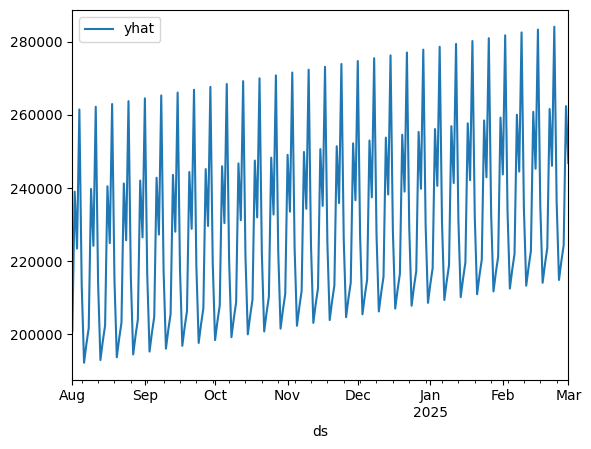

In [160]:
final_total_forecast[final_total_forecast["ds"]>="2024-08-01"].plot("ds","yhat")

In [157]:
final_total_forecast.head(100)

,ds,yhat
0,2023-03-01,148723.0
1,2023-03-02,153089.0
2,2023-03-03,191048.0
3,2023-03-04,175484.0
4,2023-03-05,213446.0
...,...,...
95,2023-06-04,220332.0
96,2023-06-05,172309.0
97,2023-06-06,151099.0
98,2023-06-07,156139.0


In [153]:
final_submission = data_final_prop[data_final_prop["ds"]>"2024-12-31"]
final_submission = final_submission[final_submission["ds"]< "2025-03-01"]
final_submission["route_key"] = final_submission['ds'].astype(str)+"_"+final_submission["srcid"].astype(str)+"_"+final_submission["destid"].astype(str)
final_submission = final_submission[["route_key","final_seatcount"]]
final_submission.to_csv("final_submission.csv")


In [162]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 1. Load the data
df = pd.read_csv('train/train.csv')

# 2. Feature Engineering
df['doj'] = pd.to_datetime(df['doj'])
df['dayofweek'] = df['doj'].dt.dayofweek
df['dayofmonth'] = df['doj'].dt.day
df['month'] = df['doj'].dt.month
df['year'] = df['doj'].dt.year

# 3. Encode srcid and destid
le_src = LabelEncoder()
le_dest = LabelEncoder()
df['srcid_encoded'] = le_src.fit_transform(df['srcid'])
df['destid_encoded'] = le_dest.fit_transform(df['destid'])

# Define features (X) and target (y)
features = ['dayofweek', 'dayofmonth', 'month', 'year', 'srcid_encoded', 'destid_encoded']
target = 'final_seatcount'

X = df[features]
y = df[target]

# 4. Split data into training and testing sets (95% train, 5% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# 5. Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# 6. Predict on the test set and evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) on the test set: {mae:.2f}")

# 7. Generate predictions for the next 60 days
# Determine the last date in the historical data
last_historical_date = df['doj'].max()

# Generate future dates for the next 60 days
future_dates = pd.date_range(start=last_historical_date + pd.Timedelta(days=1), periods=60)

# Get all unique route combinations from the original data
unique_routes_historical = df[['srcid', 'destid']].drop_duplicates()

# Create a DataFrame for future predictions
future_predictions = []

for _, row in unique_routes_historical.iterrows():
    srcid = row['srcid']
    destid = row['destid']

    # Create a DataFrame for each route's future dates
    route_future_df = pd.DataFrame({'doj': future_dates})
    route_future_df['srcid'] = srcid
    route_future_df['destid'] = destid

    future_predictions.append(route_future_df)

# Concatenate all future prediction DataFrames
future_df = pd.concat(future_predictions).reset_index(drop=True)

# Feature engineer for future_df
future_df['dayofweek'] = future_df['doj'].dt.dayofweek
future_df['dayofmonth'] = future_df['doj'].dt.day
future_df['month'] = future_df['doj'].dt.month
future_df['year'] = future_df['doj'].dt.year

# Encode srcid and destid for future_df using the *fitted* LabelEncoders
# Handle unseen srcid/destid in future data by assigning -1
def safe_transform(le, val):
    try:
        return le.transform([val])[0]
    except ValueError:
        return -1 # Assign -1 for unseen values, these rows will be filtered

future_df['srcid_encoded'] = future_df['srcid'].apply(lambda x: safe_transform(le_src, x))
future_df['destid_encoded'] = future_df['destid'].apply(lambda x: safe_transform(le_dest, x))

# Filter out rows where encoding failed (e.g., -1 was assigned for unseen values)
future_df = future_df[
    (future_df['srcid_encoded'] != -1) &
    (future_df['destid_encoded'] != -1)
]

# Ensure the feature columns match the training features
X_future = future_df[features]

# Predict future final_seatcount
future_df['predicted_final_seatcount'] = model.predict(X_future)

# Ensure predictions are non-negative
future_df['predicted_final_seatcount'] = future_df['predicted_final_seatcount'].apply(lambda x: max(0, x))

# Display the first few rows of the predictions
print("\nPredictions for the next 60 days:")
print(future_df[['doj', 'srcid', 'destid', 'predicted_final_seatcount']].head().to_markdown(index=False, numalign="left", stralign="left"))

# Display info about the predictions DataFrame
print(future_df[['doj', 'srcid', 'destid', 'predicted_final_seatcount']].info())

Mean Absolute Error (MAE) on the test set: 346.07

Predictions for the next 60 days:
| doj                 | srcid   | destid   | predicted_final_seatcount   |
|:--------------------|:--------|:---------|:----------------------------|
| 2025-01-01 00:00:00 | 45      | 46       | 5068.12                     |
| 2025-01-02 00:00:00 | 45      | 46       | 3884.2                      |
| 2025-01-03 00:00:00 | 45      | 46       | 4665.86                     |
| 2025-01-04 00:00:00 | 45      | 46       | 3663.92                     |
| 2025-01-05 00:00:00 | 45      | 46       | 4459.28                     |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   doj                        6000 non-null   datetime64[ns]
 1   srcid                      6000 non-null   int64         
 2   destid                     

In [167]:
future_df[future_df["srcid_encoded"]==1].head()

future_df['srcid'] = future_df['srcid'].astype(str)
future_df['destid'] = future_df['destid'].astype(str)
future_df['srcid']=  future_df['srcid'].str.zfill(2)
future_df['destid'] = future_df['destid'].str.zfill(2)

In [ ]:
future_df[future_df["srcid_encoded"]==1].head()



,doj,srcid,destid,dayofweek,dayofmonth,month,year,srcid_encoded,destid_encoded,predicted_final_seatcount
1020,2025-01-01,02,40,2,1,1,2025,1,36,2502.76
1021,2025-01-02,02,40,3,2,1,2025,1,36,2275.32
1022,2025-01-03,02,40,4,3,1,2025,1,36,2668.16
1023,2025-01-04,02,40,5,4,1,2025,1,36,2432.20
1024,2025-01-05,02,40,6,5,1,2025,1,36,2129.76


In [173]:
final_submission = future_df[future_df["doj"]>"2024-12-31"]
final_submission = final_submission[final_submission["doj"]< "2025-03-01"]
final_submission = final_submission.rename({"doj":"ds","predicted_final_seatcount":"final_seatcount"},axis=1)
final_submission["route_key"] = final_submission['ds'].astype(str)+"_"+final_submission["srcid"].astype(str)+"_"+final_submission["destid"].astype(str)
final_submission = final_submission[["route_key","final_seatcount"]]
final_submission["final_seatcount"] = final_submission.final_seatcount.round()
final_submission.to_csv("final_submission.csv",index=False)

### going to try SARIMAX

In [185]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore") # Suppress convergence warnings

# Load the data
df = pd.read_csv('train/train.csv')

# Convert 'doj' to datetime
df['doj'] = pd.to_datetime(df['doj'])

# Create a unique route identifier
df['route_id'] = df['srcid'].astype(str).str.zfill(2) + '_' + df['destid'].astype(str).str.zfill(2)

# Aggregate final_seatcount by doj and route_id
df_agg = df.groupby(['doj', 'route_id'])['final_seatcount'].sum().reset_index()

# Sort by date for time series modeling
df_agg = df_agg.sort_values(by='doj')

unique_routes = df_agg['route_id'].unique()
all_sarimax_predictions = []

print(f"Starting SARIMAX forecasting for {len(unique_routes)} routes...")

for i, route_id in enumerate(unique_routes):
    print(f"Processing route {i+1}/{len(unique_routes)}: {route_id}")

    # Filter data for the current route
    route_df = df_agg[df_agg['route_id'] == route_id].copy()
    route_df.set_index('doj', inplace=True)

    # Ensure the series is continuous for SARIMAX (fill missing dates if any)
    # This step is crucial for time series models assuming regular frequency
    idx = pd.date_range(start=route_df.index.min(), end=route_df.index.max(), freq='D')
    route_df = route_df.reindex(idx, fill_value=0) # Fill missing seat counts with 0 or NaN, depending on assumption
                                                    # Using 0 here for simplicity, NaN could also be forward-filled/interpolated
    # Use fillna(0) to ensure no NaN values in the series for SARIMAX, or resample and sum
    route_df['final_seatcount'] = route_df['final_seatcount'].fillna(0)


    try:
        # Define SARIMAX model parameters
        # order=(p,d,q) and seasonal_order=(P,D,Q,s)
        # Assuming daily data with weekly seasonality (s=7)
        sarimax_model = SARIMAX(
            route_df['final_seatcount'],
            order=(1, 1, 1),           # Non-seasonal p, d, q
            seasonal_order=(1, 1, 1, 7), # Seasonal P, D, Q, s (s=7 for weekly)
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        sarimax_fit = sarimax_model.fit(disp=False) # disp=False to suppress optimization output

        # Predict the next 60 days
        forecast_steps = 60
        forecast = sarimax_fit.predict(start=len(route_df), end=len(route_df) + forecast_steps - 1)

        # Create a DataFrame for predictions
        future_dates = pd.date_range(start=route_df.index.max() + pd.Timedelta(days=1), periods=forecast_steps)
        predictions_df = pd.DataFrame({
            'ds': future_dates,
            'yhat': forecast.values,
            'route_id': route_id
        })

        # Ensure predictions are non-negative
        predictions_df['yhat'] = predictions_df['yhat'].apply(lambda x: max(0, x))

        all_sarimax_predictions.append(predictions_df)

    except Exception as e:
        print(f"  Error fitting SARIMAX for route {route_id}: {e}")
        # In case of error, append placeholder for this route
        future_dates_error = pd.date_range(start=route_df.index.max() + pd.Timedelta(days=1), periods=60)
        error_df = pd.DataFrame({
            'ds': future_dates_error,
            'yhat': 0, # Assign 0 or NaN for routes with errors
            'route_id': route_id
        })
        all_sarimax_predictions.append(error_df)

# Concatenate all predictions into a single DataFrame
final_sarimax_predictions_df = pd.concat(all_sarimax_predictions).reset_index(drop=True)

# Display the first 5 rows of the final predictions DataFrame
print("\nFinal SARIMAX Predictions for the next 60 days (first 5 rows):")
print(final_sarimax_predictions_df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display info about the predictions DataFrame
print(final_sarimax_predictions_df.info())

Starting SARIMAX forecasting for 100 routes...
Processing route 1/100: 01_02
Processing route 2/100: 45_44
Processing route 3/100: 45_42
Processing route 4/100: 45_39
Processing route 5/100: 45_34
Processing route 6/100: 45_28
Processing route 7/100: 45_09
Processing route 8/100: 45_05
Processing route 9/100: 45_03
Processing route 10/100: 44_46
Processing route 11/100: 44_45
Processing route 12/100: 43_47
Processing route 13/100: 42_45
Processing route 14/100: 41_36
Processing route 15/100: 40_02
Processing route 16/100: 39_45
Processing route 17/100: 38_36
Processing route 18/100: 37_36
Processing route 19/100: 36_41
Processing route 20/100: 36_37
Processing route 21/100: 36_27
Processing route 22/100: 36_22
Processing route 23/100: 45_46
Processing route 24/100: 45_48
Processing route 25/100: 46_09
Processing route 26/100: 46_15
Processing route 27/100: 48_46
Processing route 28/100: 48_45
Processing route 29/100: 47_46
Processing route 30/100: 47_45
Processing route 31/100: 47_43
P

In [189]:
final_sarimax_predictions_df.head()

,ds,yhat,route_id
0,2025-01-01,1282.275836,01_02
1,2025-01-02,1244.416085,01_02
2,2025-01-03,1365.402758,01_02
3,2025-01-04,1370.342316,01_02
4,2025-01-05,1668.594325,01_02


In [190]:



final_submission = final_sarimax_predictions_df[final_sarimax_predictions_df["ds"]>"2024-12-31"]
final_submission = final_submission[final_submission["ds"]< "2025-03-01"]
final_submission = final_submission.rename({"yhat":"final_seatcount"},axis=1)
final_submission["route_key"] = final_submission['ds'].astype(str)+"_"+final_submission["route_id"].astype(str)
final_submission = final_submission[["route_key","final_seatcount"]]
final_submission["final_seatcount"] = final_submission.final_seatcount.round()
final_submission.to_csv("final_submission.csv",index=False)

In [191]:
final_submission.head()

,route_key,final_seatcount
0,2025-01-01_01_02,1282.0
1,2025-01-02_01_02,1244.0
2,2025-01-03_01_02,1365.0
3,2025-01-04_01_02,1370.0
4,2025-01-05_01_02,1669.0


In [192]:
### SARIMAX

In [194]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
import numpy as np

warnings.filterwarnings("ignore") # Suppress convergence warnings

# 1. Load the data
df = pd.read_csv('train/train.csv')

# 2. Convert 'doj' to datetime and create route_id
df['doj'] = pd.to_datetime(df['doj'])
df['route_id'] = df['srcid'].astype(str).str.zfill(2) + '_' + df['destid'].astype(str).str.zfill(2)

# 3. Aggregate final_seatcount by doj and route_id
df_agg = df.groupby(['doj', 'route_id'])['final_seatcount'].sum().reset_index()

# Sort by date for time series modeling
df_agg = df_agg.sort_values(by='doj')

unique_routes = df_agg['route_id'].unique()
all_sarimax_predictions = []

# Define a set of SARIMAX parameter combinations to try for each route
# (p,d,q) and (P,D,Q,s)
sarimax_orders = [
    ((1, 1, 1), (1, 1, 1, 7)), # General ARMA with differencing and seasonality
    ((0, 1, 1), (0, 1, 1, 7)), # Differenced MA with seasonal MA
    ((1, 1, 0), (1, 1, 0, 7)), # Differenced AR with seasonal AR
    ((1, 0, 0), (1, 0, 0, 7)), # Simple AR with seasonal AR (no differencing)
    ((0, 0, 0), (0, 0, 0, 0))  # Baseline (white noise, no seasonality/trend)
]

print(f"Starting SARIMAX forecasting with parameter search for {len(unique_routes)} routes. This may take a while...")

for i, route_id in enumerate(unique_routes):
    print(f"\nProcessing route {i+1}/{len(unique_routes)}: {route_id}")

    # Filter data for the current route
    route_df = df_agg[df_agg['route_id'] == route_id].copy()
    route_df.set_index('doj', inplace=True)

    # Ensure the series is continuous for SARIMAX (fill missing dates if any)
    # Reindex to a daily frequency and fill NaNs with 0 (or a more suitable imputation if known)
    idx = pd.date_range(start=route_df.index.min(), end=route_df.index.max(), freq='D')
    route_df = route_df.reindex(idx)
    route_df['final_seatcount'] = route_df['final_seatcount'].fillna(0) # Filling missing daily counts with 0


    best_aic = np.inf
    best_model_fit = None
    best_order = None

    # Iterate through SARIMAX parameter combinations
    for order, seasonal_order in sarimax_orders:
        try:
            temp_model = SARIMAX(
                route_df['final_seatcount'],
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False,
                freq='D' # Specify frequency for SARIMAX
            )
            temp_fit = temp_model.fit(disp=False, maxiter=50) # Limit iterations to prevent long runs
            if temp_fit.aic < best_aic:
                best_aic = temp_fit.aic
                best_model_fit = temp_fit
                best_order = (order, seasonal_order)
            # print(f"    Tried Order {order}x{seasonal_order} - AIC: {temp_fit.aic:.2f}")

        except Exception as e:
            # print(f"    Failed to fit Order {order}x{seasonal_order}: {e}")
            continue # Try next combination

    if best_model_fit is None:
        print(f"  Could not find a suitable SARIMAX model for route {route_id} with tested parameters.")
        # If no model could be fitted, append placeholder predictions
        future_dates_error = pd.date_range(start=route_df.index.max() + pd.Timedelta(days=1), periods=60)
        error_df = pd.DataFrame({
            'doj': future_dates_error,
            'predicted_final_seatcount': 0, # Assign 0 for routes with errors
            'route_id': route_id
        })
        all_sarimax_predictions.append(error_df)
        continue

    print(f"  Best SARIMAX model for {route_id} has order {best_order} with AIC: {best_aic:.2f}")

    # Predict the next 60 days using the best model
    forecast_steps = 60
    forecast = best_model_fit.predict(start=len(route_df), end=len(route_df) + forecast_steps - 1)

    # Create a DataFrame for predictions
    future_dates = pd.date_range(start=route_df.index.max() + pd.Timedelta(days=1), periods=forecast_steps)
    predictions_df = pd.DataFrame({
        'doj': future_dates,
        'predicted_final_seatcount': forecast.values,
        'route_id': route_id
    })

    # Ensure predictions are non-negative
    predictions_df['predicted_final_seatcount'] = predictions_df['predicted_final_seatcount'].apply(lambda x: max(0, x))

    all_sarimax_predictions.append(predictions_df)

# Concatenate all predictions into a single DataFrame
final_sarimax_predictions_df = pd.concat(all_sarimax_predictions).reset_index(drop=True)

# Display the first 5 rows of the final predictions DataFrame
print("\nFinal SARIMAX Predictions for the next 60 days (first 5 rows):")
print(final_sarimax_predictions_df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display info about the predictions DataFrame
print(final_sarimax_predictions_df.info())

Starting SARIMAX forecasting with parameter search for 100 routes. This may take a while...

Processing route 1/100: 01_02
  Best SARIMAX model for 01_02 has order ((1, 1, 1), (1, 1, 1, 7)) with AIC: 8939.27

Processing route 2/100: 45_44
  Best SARIMAX model for 45_44 has order ((1, 1, 1), (1, 1, 1, 7)) with AIC: 9266.49

Processing route 3/100: 45_42
  Best SARIMAX model for 45_42 has order ((1, 1, 1), (1, 1, 1, 7)) with AIC: 9728.11

Processing route 4/100: 45_39
  Best SARIMAX model for 45_39 has order ((1, 1, 1), (1, 1, 1, 7)) with AIC: 9866.71

Processing route 5/100: 45_34
  Best SARIMAX model for 45_34 has order ((1, 1, 1), (1, 1, 1, 7)) with AIC: 10209.85

Processing route 6/100: 45_28
  Best SARIMAX model for 45_28 has order ((1, 1, 1), (1, 1, 1, 7)) with AIC: 10068.66

Processing route 7/100: 45_09
  Best SARIMAX model for 45_09 has order ((1, 1, 1), (1, 1, 1, 7)) with AIC: 10262.17

Processing route 8/100: 45_05
  Best SARIMAX model for 45_05 has order ((1, 1, 1), (1, 1, 1,

In [201]:
final_sarimax_predictions_df.head()

,ds,predicted_final_seatcount,route_id
0,2025-01-01,1282.275836,01_02
1,2025-01-02,1244.416085,01_02
2,2025-01-03,1365.402758,01_02
3,2025-01-04,1370.342316,01_02
4,2025-01-05,1668.594325,01_02


In [202]:
final_sarimax_predictions_df = final_sarimax_predictions_df.rename({"doj":"ds","predicted_final_seatcount":"final_seatcount"},axis=1)

In [203]:
final_submission = final_sarimax_predictions_df[final_sarimax_predictions_df["ds"]>"2024-12-31"]
final_submission = final_submission[final_submission["ds"]< "2025-03-01"]
final_submission = final_submission.rename({"yhat":"final_seatcount"},axis=1)
final_submission["route_key"] = final_submission['ds'].astype(str)+"_"+final_submission["route_id"].astype(str)
final_submission = final_submission[["route_key","final_seatcount"]]
final_submission["final_seatcount"] = final_submission.final_seatcount.round()
final_submission.to_csv("final_submission.csv",index=False)